In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1 Виведіть перші 5 рядків таблиці
# Зчитуємо дані з вказаного URL
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

# Зчитуємо таблицю в DataFrame
data = pd.read_html(url, header=0)[2]  # Обираємо другий елемент списку, де знаходиться таблиця

df_1 = data.head(5)
# Виводимо перші 5 рядків таблиці
print(df_1)

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


In [87]:
#2 Визначте кількість рядків і стовпчиків за допомогою атрибуту shape
num_rows, num_columns = data.shape
print(f"Кількість рядків: {num_rows}, Кількість стовпчиків: {num_columns}")

Кількість рядків: 32, Кількість стовпчиків: 5


In [88]:
#3 Визначте загальну кількість років та кількість місяців у даних
num_years = len(data['Рік']) - 1  # віднімання 1, оскільки перший стовпець - назва
num_months = num_years*12
print("Загальна кількість років =", num_years)
print("Загальна кількість місяців =", num_months)

Загальна кількість років = 31
Загальна кількість місяців = 372


In [89]:
#4 Замінити пропущені значення «-» в таблиці на NaN
data = data.rename(columns={
    "Рік": "Year",
    "В національній валюті": "Salary in UAH",
    "В доларах США": "Salary in USD",
    "Кількість кг хліба[20] на середню зарплату": "Bread per Salary",
    "Кількість БігМаків на середню зарплату": "BigMacs per Salary"
})
data = data.replace("—", np.nan)
data

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88▲","28,04▼","1015,67▲",NaN
1,1993,163533▲,"36,03▲","430,42▼",NaN
2,1994,1426343▲,"44,99▲","372,76▼",NaN
3,1995,7304000▲,"49,53▲","201,76▼",NaN
4,1996,"125,23▼","68,45▲","198,62▼",NaN
5,1997,"143,09▲","76,86▲","211,13▲",20[21]
6,1998,"152,83▲","62,39▼","177,69▼",н.д.
7,1999,"177,39▲","42,95▼","180,68▲",24▲[22]
8,2000,"231,04▲","42,47▼","117,51▼",н.д.
9,2001,"311,62▲","58,01▲","153,57▲",50▲[23]


In [90]:
#5 Визначити тип стовпців за допомогою dtypes
column_types = data.dtypes
print("Типи стовпців:")
print(column_types)

Типи стовпців:
Year                  object
Salary in UAH         object
Salary in USD         object
Bread per Salary      object
BigMacs per Salary    object
dtype: object


In [91]:
#6 Видаліть передостанній і останній стовпчики ( Кількість кг хліба[20] на середню зарплату,  Кількість Біг Маків на середню зарплату). Далі працюйте з оновленою таблицею
data = data.drop(columns=["Bread per Salary", "BigMacs per Salary"])
data

,Year,Salary in UAH,Salary in USD
0,1992,"5832,88▲","28,04▼"
1,1993,163533▲,"36,03▲"
2,1994,1426343▲,"44,99▲"
3,1995,7304000▲,"49,53▲"
4,1996,"125,23▼","68,45▲"
5,1997,"143,09▲","76,86▲"
6,1998,"152,83▲","62,39▼"
7,1999,"177,39▲","42,95▼"
8,2000,"231,04▲","42,47▼"
9,2001,"311,62▲","58,01▲"


In [92]:
#7 Замінити тип нечислових даних на числові
#Видалимо трикутники
data["Salary in UAH"] = data["Salary in UAH"].str.replace('▲', "").str.replace('▼', "")
data["Salary in USD"] = data["Salary in USD"].str.replace('▲', "").str.replace('▼', "")
data

data['Salary in UAH'] = data['Salary in UAH'].str.replace(',', '.').astype(float)
data['Salary in USD'] = data['Salary in USD'].str.replace(',', '.').astype(float)
data

,Year,Salary in UAH,Salary in USD
0,1992,5832.88,28.04
1,1993,163533.00,36.03
2,1994,1426343.00,44.99
3,1995,7304000.00,49.53
4,1996,125.23,68.45
5,1997,143.09,76.86
6,1998,152.83,62.39
7,1999,177.39,42.95
8,2000,231.04,42.47
9,2001,311.62,58.01


In [93]:
#8 Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len)
chastka_propuskiv_uah = (data['Salary in UAH'].isnull().sum() / len(data)) * 100
# Виводимо результат
print("Частка пропусків у колонці Заробітна плата у гривнях: ", chastka_propuskiv_uah)
chastka_propuskiv_usd = (data['Salary in USD'].isnull().sum() / len(data)) * 100
# Виводимо результат
print("Частка пропусків у колонці Заробітна плата у доларах: ", chastka_propuskiv_usd)


Частка пропусків у колонці Заробітна плата у гривнях:  0.0
Частка пропусків у колонці Заробітна плата у доларах:  0.0


In [94]:
#9 Замініть всі пропущені значення на середні значення по (стовпцю)
data['Salary in UAH'].fillna(data.mean(), inplace=True)
data['Salary in USD'].fillna(data.mean(), inplace=True)

data

<ipython-input-94-483af8d11c65>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data['Salary in UAH'].fillna(data.mean(), inplace=True)
<ipython-input-94-483af8d11c65>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data['Salary in USD'].fillna(data.mean(), inplace=True)


,Year,Salary in UAH,Salary in USD
0,1992,5832.88,28.04
1,1993,163533.00,36.03
2,1994,1426343.00,44.99
3,1995,7304000.00,49.53
4,1996,125.23,68.45
5,1997,143.09,76.86
6,1998,152.83,62.39
7,1999,177.39,42.95
8,2000,231.04,42.47
9,2001,311.62,58.01


In [95]:
#10 Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату
# Знаходимо рік з найвищою зарплатою
highest_salary_year = data[data['Salary in UAH'] == data['Salary in UAH'].max()]['Year'].values[0]

# Знаходимо найвищу зарплату
highest_salary = data['Salary in UAH'].max()

print(f"Рік з найвищою зарплатою в Україні: {highest_salary_year}")
print(f"Найвища зарплата в Україні: {highest_salary} UAH")

Рік з найвищою зарплатою в Україні: 1995
Найвища зарплата в Україні: 7304000.0 UAH


In [96]:
#11 Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату
# Знаходимо рік з мінімальною зарплатою
min_salary_year = data[data['Salary in USD'] == data['Salary in USD'].min()]['Year'].values[0]

# Знаходимо мінімальну зарплату
min_salary = data['Salary in USD'].min()

print(f"Рік з мінімальною зарплатою в Україні в доларах США: {min_salary_year}")
print(f"Мінімальна зарплата в Україні в доларах США: {min_salary} USD")

Рік з мінімальною зарплатою в Україні в доларах США: 1992
Мінімальна зарплата в Україні в доларах США: 28.04 USD


In [97]:
#12 Виведіть роки, коли зарплата в грн була вище середньої
# Знаходимо середню зарплату в гривнях
average_salary = data['Salary in UAH'].mean()

# Вибираємо роки, коли зарплата була вище середньої
years_above_average = data[data['Salary in UAH'] > average_salary]['Year'].tolist()


print("Роки, коли зарплата в гривнях була вище середньої:")
print(years_above_average)


Роки, коли зарплата в гривнях була вище середньої:
['1994', '1995']


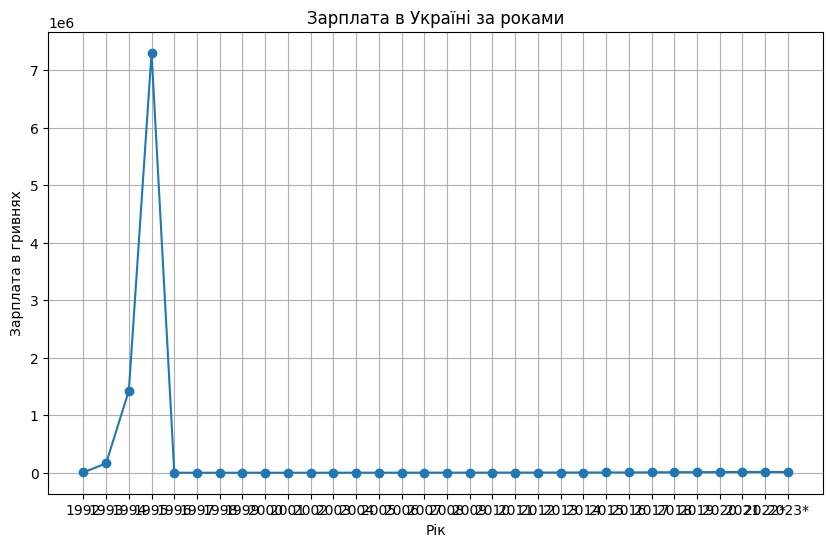

In [98]:
#13 Створіть графік, що відображає  зарплату в Україні з часом (за роками)
# Створюємо графік

plt.figure(figsize=(10, 6))  # Встановлюємо розмір графіка
plt.plot(data['Year'], data['Salary in UAH'], marker='o', linestyle='-')
plt.title('Зарплата в Україні за роками')
plt.xlabel('Рік')
plt.ylabel('Зарплата в гривнях')
plt.grid(True)

# Виводимо графік на екран
plt.show()

In [99]:
#14 Видаліть останній рік з таблиці та виведіть оновлену таблицю
# Видаляємо останній рік
data = data[:-1]

print("Оновлена таблиця без останнього року:")
print(data)

Оновлена таблиця без останнього року:
     Year  Salary in UAH  Salary in USD
0    1992        5832.88          28.04
1    1993      163533.00          36.03
2    1994     1426343.00          44.99
3    1995     7304000.00          49.53
4    1996         125.23          68.45
5    1997         143.09          76.86
6    1998         152.83          62.39
7    1999         177.39          42.95
8    2000         231.04          42.47
9    2001         311.62          58.01
10   2002         375.98          70.59
11   2003         462.58          86.74
12   2004         590.53         111.02
13   2005         806.14         157.30
14   2006        1042.88         206.51
15   2007        1352.75         267.87
16   2008        1808.92         343.43
17   2009        1909.25         245.05
18   2010        2246.75         283.12
19   2011        2639.17         331.24
20   2012        3031.92         379.42
21   2013        3273.82         409.59
22   2014        3474.75         292.32
23

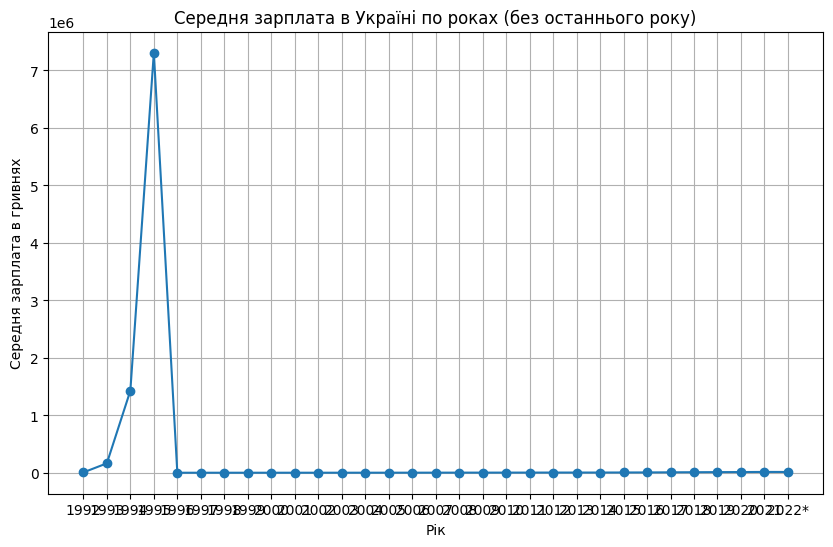

In [100]:
#15 Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року
# Групуємо дані по роках і обчислюємо середню зарплату
average_salary_by_year = data.groupby('Year')['Salary in UAH'].mean()

# Створюємо графік
plt.figure(figsize=(10, 6))  # Встановлюємо розмір графіка
plt.plot(average_salary_by_year.index, average_salary_by_year.values, marker='o', linestyle='-')
plt.title('Середня зарплата в Україні по роках (без останнього року)')
plt.xlabel('Рік')
plt.ylabel('Середня зарплата в гривнях')
plt.grid(True)

plt.show()

In [101]:
#16 Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку
# Отримуємо дані за останні два роки (останні два рядки)
last_two_years_data = data.tail(2)

# Обчислюємо зарплату за останні два роки
salary_last_two_years = last_two_years_data['Salary in UAH'].sum()

# Отримуємо дані за останні п'ять років (останні п'ять рядків)
last_five_years_data = data.tail(5)

# Обчислюємо зарплату за останні п'ять років
salary_last_five_years = last_five_years_data['Salary in UAH'].sum()

# Порівнюємо зарплату за останні два роки і за останні п'ять років
if salary_last_two_years > salary_last_five_years:
    difference_direction = "вище"
    difference_amount = salary_last_two_years - salary_last_five_years
elif salary_last_two_years < salary_last_five_years:
    difference_direction = "нижче"
    difference_amount = salary_last_five_years - salary_last_two_years
else:
    difference_direction = "рівна"
    difference_amount = 0

# Виводимо результат
print(f"Зарплата за останні два роки: {salary_last_two_years} UAH")
print(f"Зарплата за останні п'ять років: {salary_last_five_years} UAH")
print(f"Зарплата за останні два роки {difference_direction} за зарплату за останні п'ять років на {difference_amount} UAH")

Зарплата за останні два роки: 27394.01 UAH
Зарплата за останні п'ять років: 58361.689999999995 UAH
Зарплата за останні два роки нижче за зарплату за останні п'ять років на 30967.679999999997 UAH
